In [1]:
!pip install timm
!pip install matplotlib

## Seeing the layers of model to be studied

In [2]:
import timm
import torch
print(torch.__version__)
# Load model
model = timm.create_model('vit_base_patch16_224', pretrained=True)

# Set to eval mode
model.eval()


/Users/tanmaydaga/Documents/iitj/dc_work/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.7.0


VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity(

## Verifying modes

In [3]:
from PIL import Image

img = Image.open("img.jpeg")
print(f"Before Converting to RGB format = {img.format} and mode = {img.mode}")
img = img.convert("RGB")
print(f"After Converting to RGB format = {img.format} and mode = {img.mode}")

Before Converting to RGB format = JPEG and mode = RGB
After Converting to RGB format = None and mode = RGB


## Resizing Image

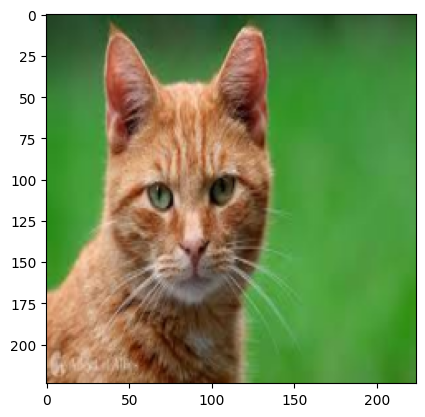

In [4]:
from torchvision import transforms
import matplotlib.pyplot as plt
resized_img = transforms.Resize((224, 224))(img)

##### Printing Array Values

# resized_img_array = np.array(resized_img)
# print(resized_img_array)

#### Showing Resized Image
plt.imshow(resized_img)

## Converting to Tensor

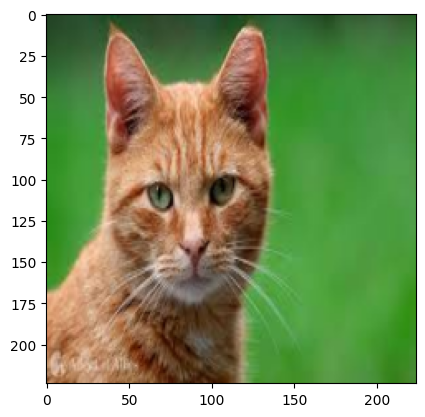

In [5]:
transformed_tensor= transforms.ToTensor()(resized_img) # (C,H,W)

##### Printing the tensor
# print(transformed_tensor)

##### To display image we need to permute the array from (C,H,W) to (H,W,C) and then display

img_for_display = transformed_tensor.permute(1, 2, 0).numpy()
plt.imshow(img_for_display)


## Normalising the tensor

In [6]:

# Converting values from [-1 , 1]
normalized_image = transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)(transformed_tensor)

input_tensor = normalized_image.unsqueeze(0)
print(type(normalized_image))
# shape = [1,3, 224, 224] values ranging in between [-1, 1]


<class 'torch.Tensor'>


## Loading the model

In [7]:
from timm.models.vision_transformer import vit_base_patch16_224

model = vit_base_patch16_224(pretrained=True)
model.eval()




VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity(

## Working on patch embedding layer

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D




with torch.no_grad():
#   [1, 768, 14, 14]   [768, 3, 16, 16]     [1 , 3, 224, 224]
    patch_embeddings = model.patch_embed.proj(input_tensor)




In [9]:
print(torch.__config__.show())
print(torch.backends.mps.is_available())



PyTorch built with:
  - GCC 4.2
  - C++ Version: 201703
  - clang 15.0.0
  - OpenMP 201811
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: NO AVX
  - Build settings: BLAS_INFO=accelerate, BUILD_TYPE=Release, COMMIT_SHA=134179474539648ba7dee1317959529fbd0e7f89, CXX_COMPILER=/usr/bin/c++, CXX_FLAGS= -fvisibility-inlines-hidden -DUSE_PTHREADPOOL -DNDEBUG -DUSE_KINETO -DLIBKINETO_NOCUPTI -DLIBKINETO_NOROCTRACER -DLIBKINETO_NOXPUPTI=ON -DUSE_PYTORCH_QNNPACK -DAT_BUILD_ARM_VEC256_WITH_SLEEF -DUSE_XNNPACK -DUSE_PYTORCH_METAL_EXPORT -DSYMBOLICATE_MOBILE_DEBUG_HANDLE -DUSE_COREML_DELEGATE -O2 -fPIC -Wall -Wextra -Werror=return-type -Werror=non-virtual-dtor -Werror=braced-scalar-init -Werror=range-loop-construct -Werror=bool-operation -Wnarrowing -Wno-missing-field-initializers -Wno-unknown-pragmas -Wno-unused-parameter -Wno-strict-overflow -Wno-strict-aliasing -Wvla-extension -Wsuggest-override -Wnewline-eof -Winconsistent-missing-override -Wincon

## Confirming other part of the patch layer ie norm layer is identity and returns the same tensor

In [10]:
with torch.no_grad():
    norm_embedding = model.patch_embed.norm(patch_embeddings)
print(torch.equal(patch_embeddings, norm_embedding))
print(norm_embedding.shape)

"""
After getting the norm embedding still the work is not done as patch_embed flattens the input as next layer demands its
"""

with torch.no_grad():
    result = model.patch_embed(input_tensor)

norm_embedding = norm_embedding.flatten(2).transpose(1,2)
                                # Flattens from 2
print(torch.equal(norm_embedding, result))
print(norm_embedding.shape)

True
torch.Size([1, 768, 14, 14])
True
torch.Size([1, 196, 768])


# Moving to Pos_drops

In [11]:
## Since working on inference of model it should pass the input data as it is
## Which implies
pos_drop_results = model.pos_drop(norm_embedding)
torch.equal(pos_drop_results , norm_embedding)

True

# Moving to Patch_drops

In [12]:
## Since working on inference of model it should pass the input data as it is
## Also we can see patch_drop layer is Identity
with torch.profiler.profile(
    activities=[torch.profiler.ProfilerActivity.CPU],
    record_shapes=True
) as prof:
    patch_drop_results = model.patch_drop(pos_drop_results)
torch.equal(patch_drop_results, pos_drop_results)
print(prof.key_averages().table(sort_by="self_mps_time_total"))

# Moving to Norm_Pre Layer

In [13]:
# Due to lack of operations Norm_pre is also Identity here
norm_pre_results = model.norm_pre(patch_drop_results)
torch.equal(patch_drop_results, norm_pre_results)

True

# Moving to Blocks
## Block 0

### Norm1

In [14]:
block0_norm1_result = model.blocks[0].norm1(norm_pre_results)

print(norm_pre_results.shape)
model.blocks[0].norm1
model.blocks[0].norm1.bias

torch.Size([1, 196, 768])


Parameter containing:
tensor([ 7.3315e-06, -2.3175e-02,  1.9251e-01, -4.2109e-03,  2.3969e-04,
        -1.9623e-01, -7.0093e-04,  7.7209e-02, -4.2162e-02, -7.0445e-04,
        -1.5635e-03,  1.1621e-02, -5.6496e-02,  2.0625e-05,  7.5908e-03,
         2.0005e-03, -2.0326e+00,  2.4512e-01,  1.0333e-01, -4.5019e-04,
         7.8077e-04, -1.3920e-03,  5.3162e-04, -5.2905e-02,  1.0951e-02,
         3.0166e-02, -5.5649e-03, -5.7120e-04, -6.1632e-03,  2.7810e-02,
         6.8983e-02,  1.1314e-03, -1.1418e-01, -4.6171e-02, -4.0045e-03,
         2.7863e-04,  8.3784e-02, -1.7606e-02, -1.0444e-03, -2.6971e-03,
        -3.6786e-02,  5.8135e-03,  4.6862e-02,  3.2336e-02, -1.7248e-02,
        -8.4231e-02,  5.7288e-02,  8.6078e-02, -2.4617e-03,  2.9501e-04,
        -5.1434e-04, -6.7000e-03, -5.5131e-04, -7.5656e-04, -3.7129e-02,
        -9.7448e-04, -5.4803e-04,  6.1755e-02, -7.9603e-02, -2.4948e-02,
         2.2079e-03, -8.7388e-03,  5.3030e-03,  1.1230e-01,  2.6446e-02,
        -3.3236e-02, -5.0002e

In [15]:
import numpy as np
layer = model.blocks[0].norm1
mean = norm_pre_results.mean( dim= -1, keepdims=True)
variance = norm_pre_results.var( dim = -1, keepdims=True, unbiased=False)

normalised = (norm_pre_results  - mean)/torch.sqrt(variance + layer.eps)


output = ( normalised * layer.weight) + layer.bias

print(output.shape)
print(block0_norm1_result.shape)
# np.inf()


torch.allclose(output, block0_norm1_result, atol=1e-6)


block0_norm1_result , output = output, block0_norm1_result


torch.Size([1, 196, 768])
torch.Size([1, 196, 768])


## Moving to attention layer

In [16]:
layer = model.blocks[0].attn.qkv

block0_qkv_result = block0_norm1_result @layer.weight.T + layer.bias

torch.allclose(block0_qkv_result,layer(block0_norm1_result),atol=1e-5)



True

In [ ]:
!pip install torchvision
import torch
import torch.onnx
import torchvision.models as models

def export_pytorch_to_onnx_without_input_tensor(model, onnx_file_path,input_tensor):
    # Set model to evaluation mode
    model.eval()

    # Automatically create a dummy tensor during export
    torch.onnx.export(
        model,  # Model to export
        input_tensor,  # Automatically generated dummy input tensor (for ResNet-18)
        onnx_file_path,  # Path to save the ONNX file
        export_params=True,  # Store learned parameters in the ONNX file
        opset_version=11,  # ONNX opset version
        do_constant_folding=True,  # Fold constants
        input_names=['input'],  # Name of the input layer
        output_names=['output'],  # Name of the output layer
        dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}}  # Allow dynamic batch size
    )
    print(f"Model exported to {onnx_file_path}")

# Example usage
if __name__ == "__main__":
    # Load a pre-trained model (e.g., ResNet-18)
    

    # Export the model to an ONNX file
    export_pytorch_to_onnx_without_input_tensor(model, 'vit_base_patch16_224.onnx',input_tensor=input_tensor)


/Users/tanmaydaga/Documents/iitj/dc_work/.venv/lib/python3.13/site-packages/torch/__init__.py:2150: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  assert condition, message
